<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">T-test</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
    The idea of a T test is comparing two groups of data (e.g.: the mean).<br>
    The H0 hypothesis is that the groups are from the same distribution.<br>
    The t-value is computed with this equation: t = (mean(x) - mean(y)) / (s / sqrt(n)). [s] is the sample standard deviation. Basically it is the difference in means divided by standard deviations.<br>
    The probabilities of t values is a mean-centered normal distribution. It is the probability of observing that t-value given the H0 hypothesis.
</p>
</div>

<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">One sample T-test</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
    Example: Test whether the IQ of a group of students is significantly different from 100.<br> 
    In other words: Estimate the probability that a certain group of students has an average IQ of 100.<br>
    t(n-1) = (mean(x) - mu) / (s/sqrt(n))<br>
    (n-1) is the degrees of freedom of the t-test because we test for the mean.<br>
    Assumptions: The data is numeric, independent from each other, randomly drawn and mean and std are valid measurements of them.
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

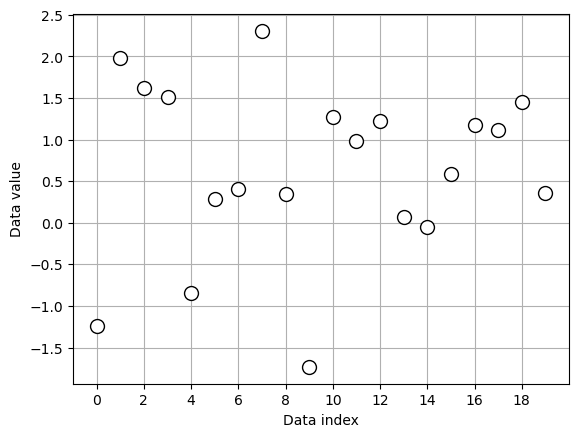

In [2]:
N = 20
populationMean = .5
data = np.random.randn(N) + populationMean

plt.plot(data, 'ko', markerfacecolor='w', markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.grid()
plt.xlim([-1, N])
plt.xticks(np.arange(0, 10)*2)
plt.show()

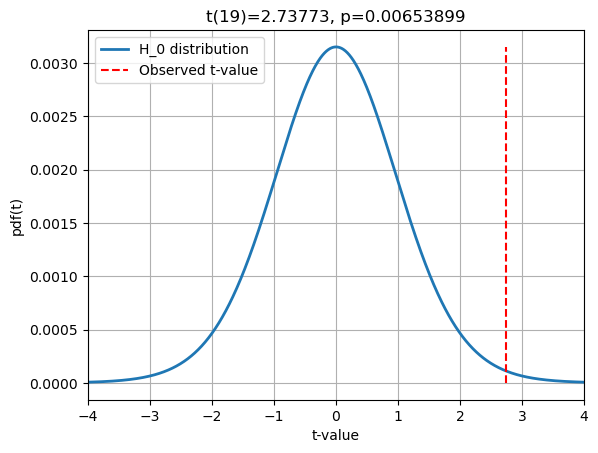

In [3]:
# "manual" T-test

H0value = 0

tValue = (np.mean(data) - H0value) / (np.std(data,ddof=1) / np.sqrt(N))

df = N - 1

pValue = 1 - stats.t.cdf(np.abs(tValue),df) # Probability of observing the sample given that H0 is true.

x = np.linspace(-4, 4, 1001)
tdist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x, tdist, linewidth=2)
plt.plot([tValue, tValue],[0, np.max(tdist)],'r--')
plt.legend(['H_0 distribution', 'Observed t-value'])
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g)=%g, p=%g'%(df, tValue, pValue))
plt.xlim([-4, 4])
plt.grid()
plt.show()

In [4]:
# Using Python libraries
t,p = stats.ttest_1samp(data,H0value)
print(t, p/2)

2.737733499012058 0.00653899257175856


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Two sample T-test</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
    We test whether two sets of number could have been drawn from the same distribution.
    <br>Example: Test whether self-reported stress levels changed after 6 weeks of "social distancing".
    <br><br>There are several different two-sample t-test formulas. The numerator is the same, the denominator depends on the groups being paired vs. unpaired, having (roughly) equal variance or not, having equal sample sizes or not.
    <br><br>Paired means we asked the same people for their stress levels before and after.
</p>
</div>

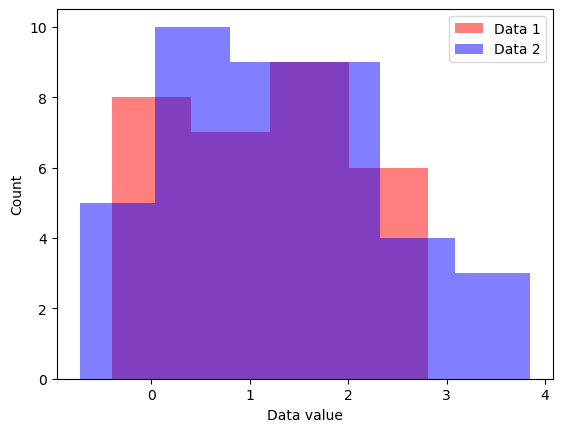

In [5]:
n1 = 30
n2 = 40
mu1 = 1
mu2 = 1.2

data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)
plt.hist(data1, bins='fd', color=[1, 0, 0, 0.5], label='Data 1')
plt.hist(data2, bins='fd', color=[0, 0, 1, 0.5], label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [6]:
t,p = stats.ttest_ind(data1, data2, equal_var=True)
df = n1 + n2 - 2
print('t(%g)=%g, p=%g'%(df, t, p))

t(68)=-1.22216, p=0.225866


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Wilcoxon signed-rank test</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
    Non-paramtric alternative to the one sample T-test or paired two sample T-test when data is not normally distributed.
</p>
</div>

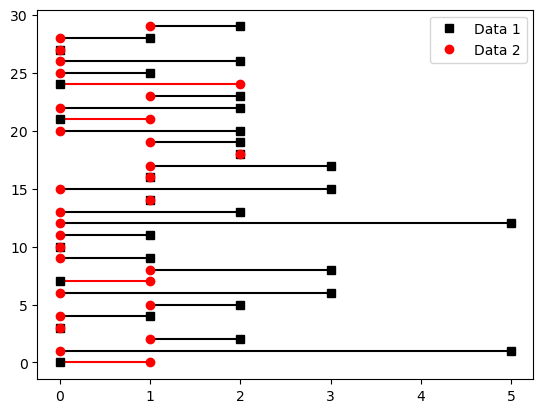

In [20]:
N = 30

data1 = np.random.poisson(1.5, N)
data2 = np.random.poisson(1, N)

colors = 'kr'
for i in range(N):
    plt.plot([data1[i], data2[i]], [i, i], colors[int(data1[i]<data2[i])])

plt.plot(data1, np.arange(N), 'ks', markerfacecolor='k', label='Data 1')
plt.plot(data2, np.arange(N), 'ro', markerfacecolor='r', label='Data 2')
plt.legend()
plt.show()

In [21]:
t,p = stats.wilcoxon(data1, data2)
print('Wilcoxon z=%g, p=%g'%(t, p))

if p < 0.05:
    print('')
    print('We reject the H0 hypothesis')
    print('The two samples are unlikely to come from the same distribution')

Wilcoxon z=38, p=0.0010709

We reject the H0 hypothesis
The two samples are unlikely to come from the same distribution


<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Mann-Whitney U test</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;padding-bottom:20px;">
    Non-paramtric alternative to the two sample T-test when data is unpaired and not normally distributed. The samples don't need to have the same sample size.
</p>
</div>

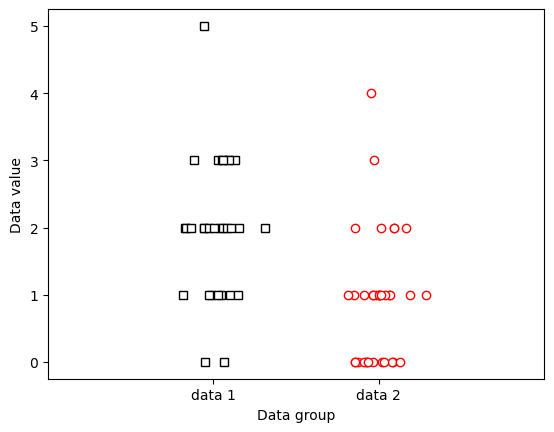

In [24]:
N1 = 30
N2 = 35

data1 = np.random.poisson(2, N1)
data2 = np.random.poisson(1, N2)

plt.plot(1 + np.random.randn(N1)/10, data1, 'ks', markerfacecolor='w')
plt.plot(2 + np.random.randn(N2)/10, data2, 'ro', markerfacecolor='w')

plt.xlim([0, 3])
plt.xticks([1, 2], ['data 1', 'data 2'])
plt.xlabel('Data group')
plt.ylabel('Data value')
plt.show()

In [25]:
U, p = stats.mannwhitneyu(data1, data2)
print(U, p)

822.5 4.880331914125397e-05
